<a href="https://colab.research.google.com/github/prav-kotte1/DM-Lab/blob/main/knnClasifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to Pandas DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_names'] = df['target'].map({i: name for i, name in enumerate(target_names)})

print("Dataset loaded successfully.")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nTarget distribution:")
print(df['target_names'].value_counts())

Dataset loaded successfully.
Number of samples: 150
Number of features: 4

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  

Target distribution:
target_names
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split and scaled successfully.")
print(f"Training set size: {X_train_scaled.shape[0]}")
print(f"Testing set size: {X_test_scaled.shape[0]}")

Data split and scaled successfully.
Training set size: 105
Testing set size: 45


In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Calculate Euclidean distances between the query point x and all training points
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]

        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority vote to determine the predicted class
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Example usage of custom KNN (using scaled data)
# Note: For practical use, scikit-learn's KNeighborsClassifier is highly optimized.
# This custom implementation is for understanding the algorithm's mechanics.

# k_value = 5
# knn_custom = KNN(k=k_value)
# knn_custom.fit(X_train_scaled, y_train)
# y_pred_custom = knn_custom.predict(X_test_scaled)

# print(f"\nCustom KNN predictions (k={k_value}):")
# print(y_pred_custom)
# print(f"Accuracy with custom KNN: {accuracy_score(y_test, y_pred_custom):.4f}")


Best K value found: 9
Best accuracy achieved: 0.9556


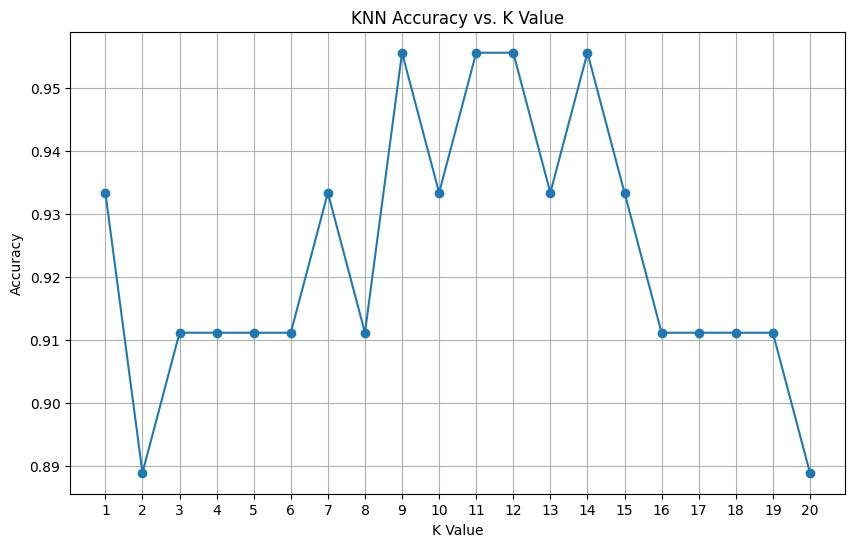

In [ ]:
# Define a range of K values to test
k_values = range(1, 21)
accuracies = []

# Train and evaluate KNN for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') # Using Euclidean distance
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    # print(f"K={k}, Accuracy={accuracy:.4f}")

# Find the best K
best_k_index = np.argmax(accuracies)
best_k = k_values[best_k_index]
best_accuracy = accuracies[best_k_index]

print(f"\nBest K value found: {best_k}")
print(f"Best accuracy achieved: {best_accuracy:.4f}")

# Plotting accuracy vs. K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Evaluation Metrics for KNN (k=9):

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


Confusion Matrix:


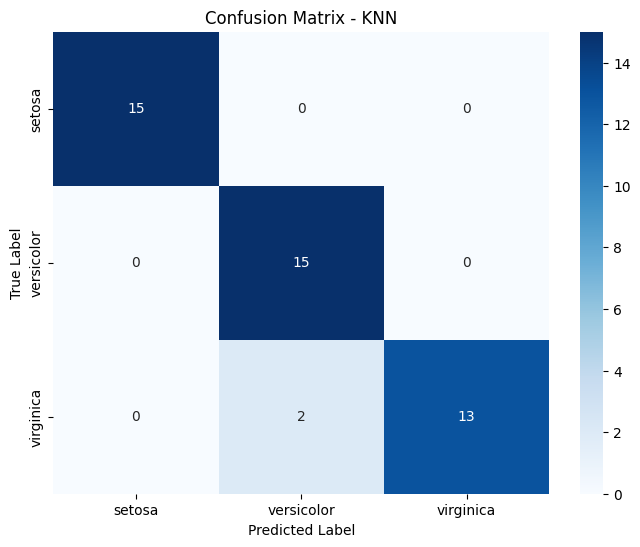

In [ ]:
# Train the final KNN model with the best K
best_knn_model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
best_knn_model.fit(X_train_scaled, y_train)
y_pred_best = best_knn_model.predict(X_test_scaled)

# Display evaluation metrics
print(f"\nEvaluation Metrics for KNN (k={best_k}):")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=target_names))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')
plt.show()


--- Comparison with Decision Tree ---

Accuracy of Decision Tree: 0.9111

Classification Report for Decision Tree:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      0.80      0.86        15
   virginica       0.82      0.93      0.88        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Confusion Matrix for Decision Tree:


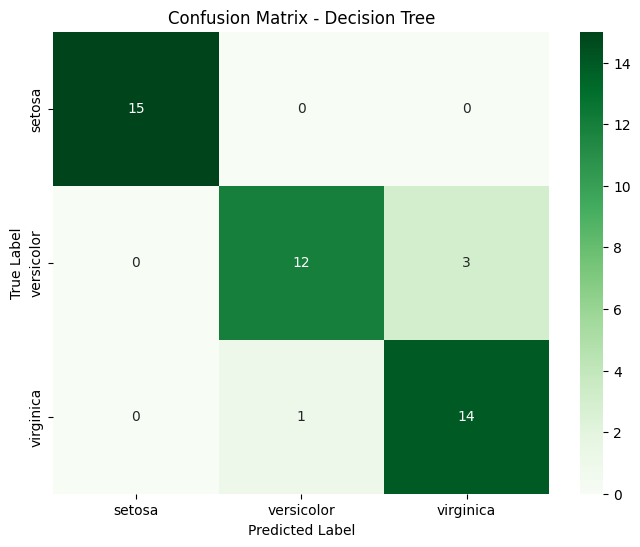

In [ ]:
# Initialize and train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train) # Using scaled data, though Decision Trees are not sensitive to feature scaling

# Predict using the Decision Tree
y_pred_dt = dt_model.predict(X_test_scaled)

# Display evaluation metrics for Decision Tree
print("\n--- Comparison with Decision Tree ---")
print(f"\nAccuracy of Decision Tree: {accuracy_score(y_test, y_pred_dt):.4f}")

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=target_names))

print("\nConfusion Matrix for Decision Tree:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

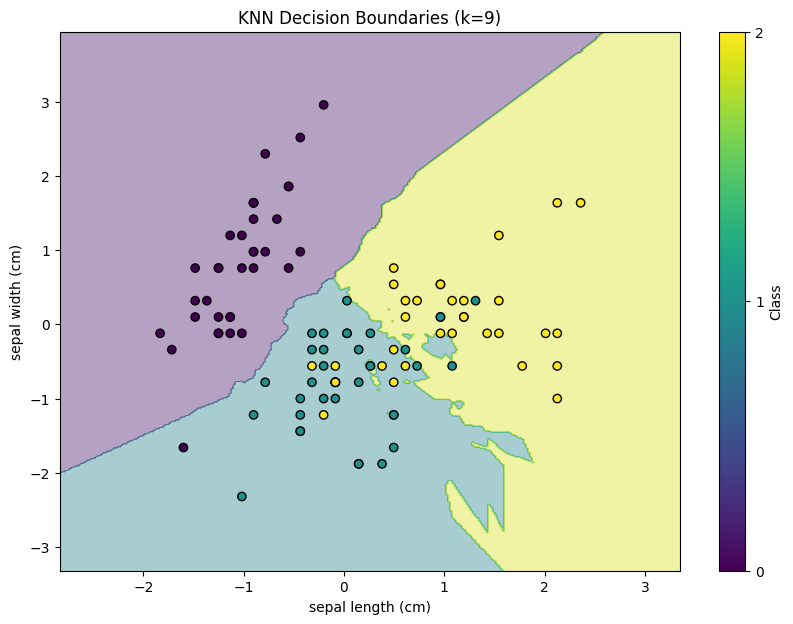

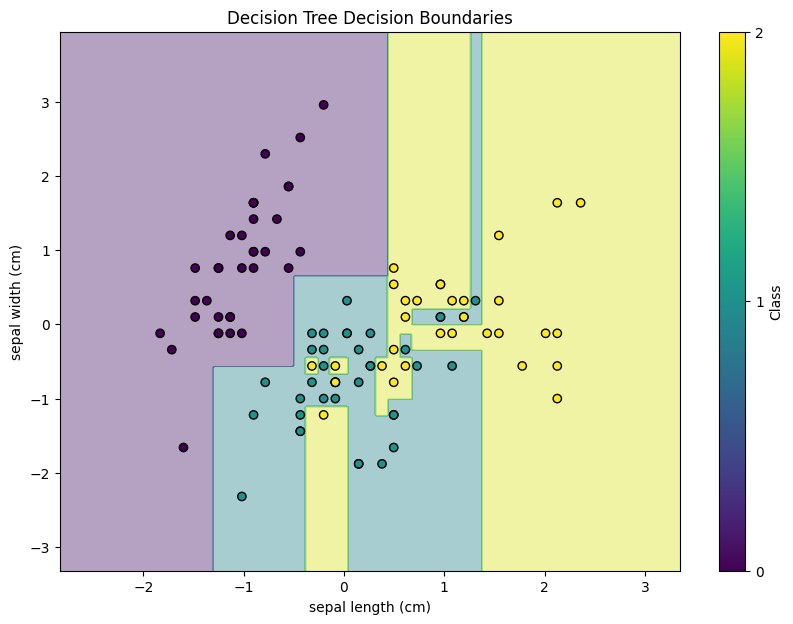

In [ ]:
# Visualize decision boundaries using two features
def plot_decision_boundary(clf, X, y, feature_names, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class for each point in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training points
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.viridis)

    # Plot also the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolors='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Class')
    plt.show()

# Select two features for visualization (e.g., sepal length and sepal width)
feature_index1 = 0
feature_index2 = 1
X_vis = X_train_scaled[:, [feature_index1, feature_index2]]
y_vis = y_train

# Train KNN for visualization with a chosen k
k_for_viz = best_k # Use the best k found earlier
knn_viz = KNeighborsClassifier(n_neighbors=k_for_viz, metric='euclidean')
knn_viz.fit(X_vis, y_vis)

# Train Decision Tree for visualization
dt_viz = DecisionTreeClassifier(random_state=42)
dt_viz.fit(X_vis, y_vis)

# Plot decision boundaries
plot_decision_boundary(knn_viz, X_vis, y_vis, [feature_names[feature_index1], feature_names[feature_index2]], f'KNN Decision Boundaries (k={k_for_viz})')
plot_decision_boundary(dt_viz, X_vis, y_vis, [feature_names[feature_index1], feature_names[feature_index2]], 'Decision Tree Decision Boundaries')